# Impractical Deep Learning for Coders Lesson 1, Matrix Multiplication
> Implementing matrix multiplication from scratch

The game: Recreate fastai, while only being able to use:

- Python
- Python stdlib
- Non-data science modules
- PyTorch array creation, RNG, and indexing
- `datasets`
- matplotlib

The game I will also be playing:

- Do this while also trying experimental note annotation
- Would I have done a different decision in implementing something than Jeremy has? If so, **do it!**
- **No `import *`**

> The difference between effective people in Deep Learning and the rest is who can make things in code that can work properly, and there's very few of those people - Jeremy Howard

3 steps to training a really good model:

1. Overfit a model -- validation error increases
2. Reduce overfitting
3. There is no step 3 -- jk, experiment and toy with

How to avoid overfitting from A -> F

1. Get more data
2. Perform more data augmentation
3. Use a more generalizable architecture
4. Try adding regularization (DropOut, wd)
5. Reduce architecture complexity

4 & 5 both have the least impact, start with the first 3

In [2]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
from fastcore.test import test_eq

from fastdownload import FastDownload

First we need to download the dataset we are using, which will be MNIST

#### Code

In [3]:
url = "https://figshare.com/ndownloader/files/25635053"
fd = FastDownload(base="~/.fastai")

Path('/home/zach/.fastai/archive/25635053')

In [4]:
path = fd.download(url); path

Path('/home/zach/.fastai/archive/25635053')

#### Explanation


In [7]:
{
    "https://figshare.com/ndownloader/files/25635053": "deeplearning.net is no longer up, so we use a version of Yann LeCun's dataset",
    "FastDownload(base='~/.fastai')": "We utilize fastdownload's `FastDownload` class to handle the downloading of the data. `from fastai import datasets` is no longer a thing.",
    "fd.download(url)": "Perform the actual downloading"
};

In [13]:
with gzip.open(path, 'rb') as f:
    ((x_train,y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

The downloaded data contains `numpy` arrays, which are not allowed so they must be converted to tensors

#### Code

In [14]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape

In [15]:
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

#### Explanation

In [10]:
{
    "map(tensor, (x_train,y_train,x_valid,y_valid))": "Applys `torch.tensor` across the four arrays, converting them all into tensors",
    "n,c = x_train.shape": "`n` = the number of rows in the training set, `c` = the number of columns in the training set"
};

#### Code

In [31]:
assert n==y_train.shape[0]==50000
test_eq(c, 28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

#### Explanation

In [32]:
{
    "assert n==y_train.shape[0]==50000": "Verify there are 50,000 items in the dataset",
    "test_eq(c, 28*28)": "Verify that each item is 28x28 numbers",
    "test_eq(y_train.min(),0)": "Verify the lowest class in the y labels is 0",
    "test_eq(y_train.max(),9)": "Verify the highest class in the y labels is 9"
};

#### Code

In [16]:
mpl.rcParams["image.cmap"] = 'gray'
img = x_train[0]
assert img.view(28,28).type() == 'torch.FloatTensor'

#### Explanation

In [17]:
{
    "img = x_train[0]": "Get one set of data from the dataset",
    "img.view(28,28).type()": "Check after viewing it as a 28,28 (more on this next) that the type is still a FloatTensor"
};

#### Code

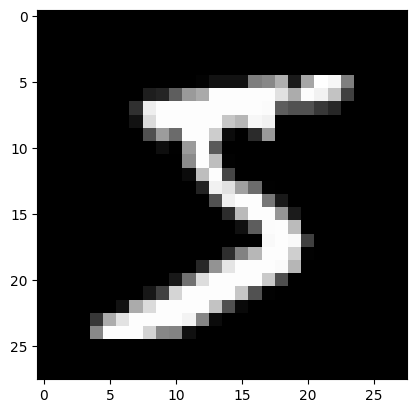

In [38]:
plt.imshow(img.view((28,28)));

#### Explanation

In [39]:
{
    "img.view((28,28))": "Reshape our 168 long vector into a 28x28 matrix"
};

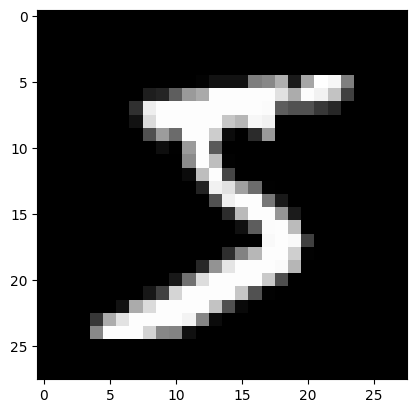

In [18]:
#hide_input
plt.imshow(img.view((28,28)));

## Initial python model

Create a simple linear model, of something akin to `y=ax+b`

#### Code

In [52]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

#### Explanation

In [40]:
{
    "torch.randn(784,10)": "This operates as `a`, a 784x10 matrix where 784==length of the array, 10==num going out",
    "torch.zeros(10)": "The bias will just start as 10 zeros"
};

### Matrix Multiplication

Core of the basic of machine learning, "affine functions".

[Cool website to visualize](https://matrixmultiplication.xyz)

#### Code

In [60]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

#### Explanation

In [61]:
{
    "(a,b)": "`a` and `b` are two matricies which should be multiplied",
    "assert ac==br": "Matrix multiplication cannot occur unless the number of columns in `a` aligns with the number of rows in `b`",
    "c":"`c` is the resulting matrix, which has a shape of `a`'s rows and `b`'s columns",
    "for i in range(ar):": "Loop of matrix B as a whole scrolling down matrix A *sideways*, imagine going row by row like a curtain coming down slowly",
    "for j in range(bc):": "Loop of each column in matrix B at each row in matrix A",
    "for k in range(ac):": "The actual loop of multiplying and adding (matrix multiplication)",
    "c[i,j] += a[i,k] * b[k,j]": "The actual multiplication being performed"
};

#### Code

In [62]:
m1 = x_valid[:5]
m2 = weights

#### Explanation

In [63]:
{
    "m1": "Five rows of the validation set",
    "m2": "Weight matrix"
};

In [64]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [65]:
%time t1=matmul(m1, m2)

CPU times: user 395 ms, sys: 0 ns, total: 395 ms
Wall time: 391 ms


In [67]:
t1.shape # 5 row, 10 col output

torch.Size([5, 10])

In [19]:
len(x_train)

50000

This is quite slow. To do a single epoch it would take ~20,000 seconds on the computer I'm using to take notes. (50,000 on Jeremy's).

This is also why we don't write things in Python. It's **unreasonably slow**. 

New goal, can we speed this up 50,000 times

### Elementwise operations

To speed things up, start with the innermost loop and make things just a little bit faster

> The way to make Python faster is to remove python - Jeremy Howard

EWO's include (+,-,*,/,>,<,==)

Example with two tensors:

In [23]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [27]:
a+b

tensor([12., 14.,  3.])

We performed `c[0] = a[0]+b[0]`, `c[1] = a[1] + b[1]`, ...

#### Code

In [31]:
c = (a < b)
c = c.float().mean()

#### Explanation

In [32]:
{
    "c = (a < b)": "We performed `c[0] = a[0]< b[0]`, `c[1] = a[1] < b[1]`, ...",
    "c":"This becomes a boolean array of `[False, True, True]`, having an average of 2/3's"
};

In [33]:
c

tensor(0.6667)

Also known as what percentage of a is less than b. We could also perform the same on a rank 2 tensor (a tensor that has 2 dimensions), aka a matrix!

In [34]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

> Note: We only convert the first number to a float as PyTorch will realize this and cast the rest as a float

Frobenius norm:

*I have no idea what this is/remember what this is*

<img src="https://mathworld.wolfram.com/images/equations/FrobeniusNorm/NumberedEquation1.svg" alt="drawing" width="400"/>


$$\|A\|_F \equiv \sqrt{\sum_{i=1}^m \sum_{j=1}^n\left|a_{i j}\right|^2}$$

In [35]:
(m*m).sum().sqrt()

tensor(16.8819)

Here is where I'd love to be able to draw and have each part layered out, so instead we'll experiment with my annotation a bit:

### Code

In [38]:
n = torch.clone(m) # For readability
(m*n).sum().sqrt()

tensor(16.8819)

### Explanation

In [43]:
{
    "m*n":"This correlates to $$\left|a_{i j}\right|$$",
    ".sum()": "This is a combination of $$\sum_{i \mathop =1}^m and \sum_{j \mathop =1}^n",
    ".sqrt()": "This correlates to this part (which has the above two parts under it as 'result') $$\sqrt{result}$$"
};

In [39]:
#hide_input
(m*n).sum().sqrt()

tensor(16.8819)